In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

In [41]:
X = iris.data 
target = iris.target 
names = iris.target_names

In [42]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
# df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

Với trường dữ liệu species là [0,1,2] tương ứng với các loại ['setosa', 'versicolor', 'virginica']

In [52]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Mục đích của dataset này là dựa trên chiều dài,chiều rộng của cánh hoa, đài hoa để xác định xem nó thuộc loại hoa nào

In [46]:
df.isnull().any(axis=0).head()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

Dataset Iris không có các dữ liệu missing value theo cột.

In [47]:
df[df.isnull().any(axis=1)].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species


Dataset Iris không có các dữ liệu missing value theo dòng.

In [62]:
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [73]:
x=df[features].copy()   # Lấy giá trị từ các thuộc tính buổi sáng 9am.
x.columns 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [74]:
y = df[['species']].copy()

In [75]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [76]:
_classifier = DecisionTreeClassifier(max_leaf_nodes=10)        # Khởi tạo mô hình Decision Tree
_classifier.fit(X_train,y_train)                          # Dùng x và y để huấn luyện mô hình

DecisionTreeClassifier(max_leaf_nodes=10)

In [77]:
y_predicted = _classifier.predict(X_test)

In [78]:
y_predicted[:10]  

array([1, 0, 2, 1, 2, 2, 2, 0, 1, 0])

In [79]:
y_test['species'][:10]

79     1
37     0
109    2
133    2
121    2
70     1
146    2
25     0
62     1
46     0
Name: species, dtype: int64

In [80]:
accuracy_score(y_test,y_predicted)*100  # Tính độ chính xác của mô hình trên tập test

92.0

In [84]:
from sklearn import tree
tree.export_graphviz(_classifier, out_file='tree.dot')      # Lưu model vào 'tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])   # Chuyển model sang dạng png

0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


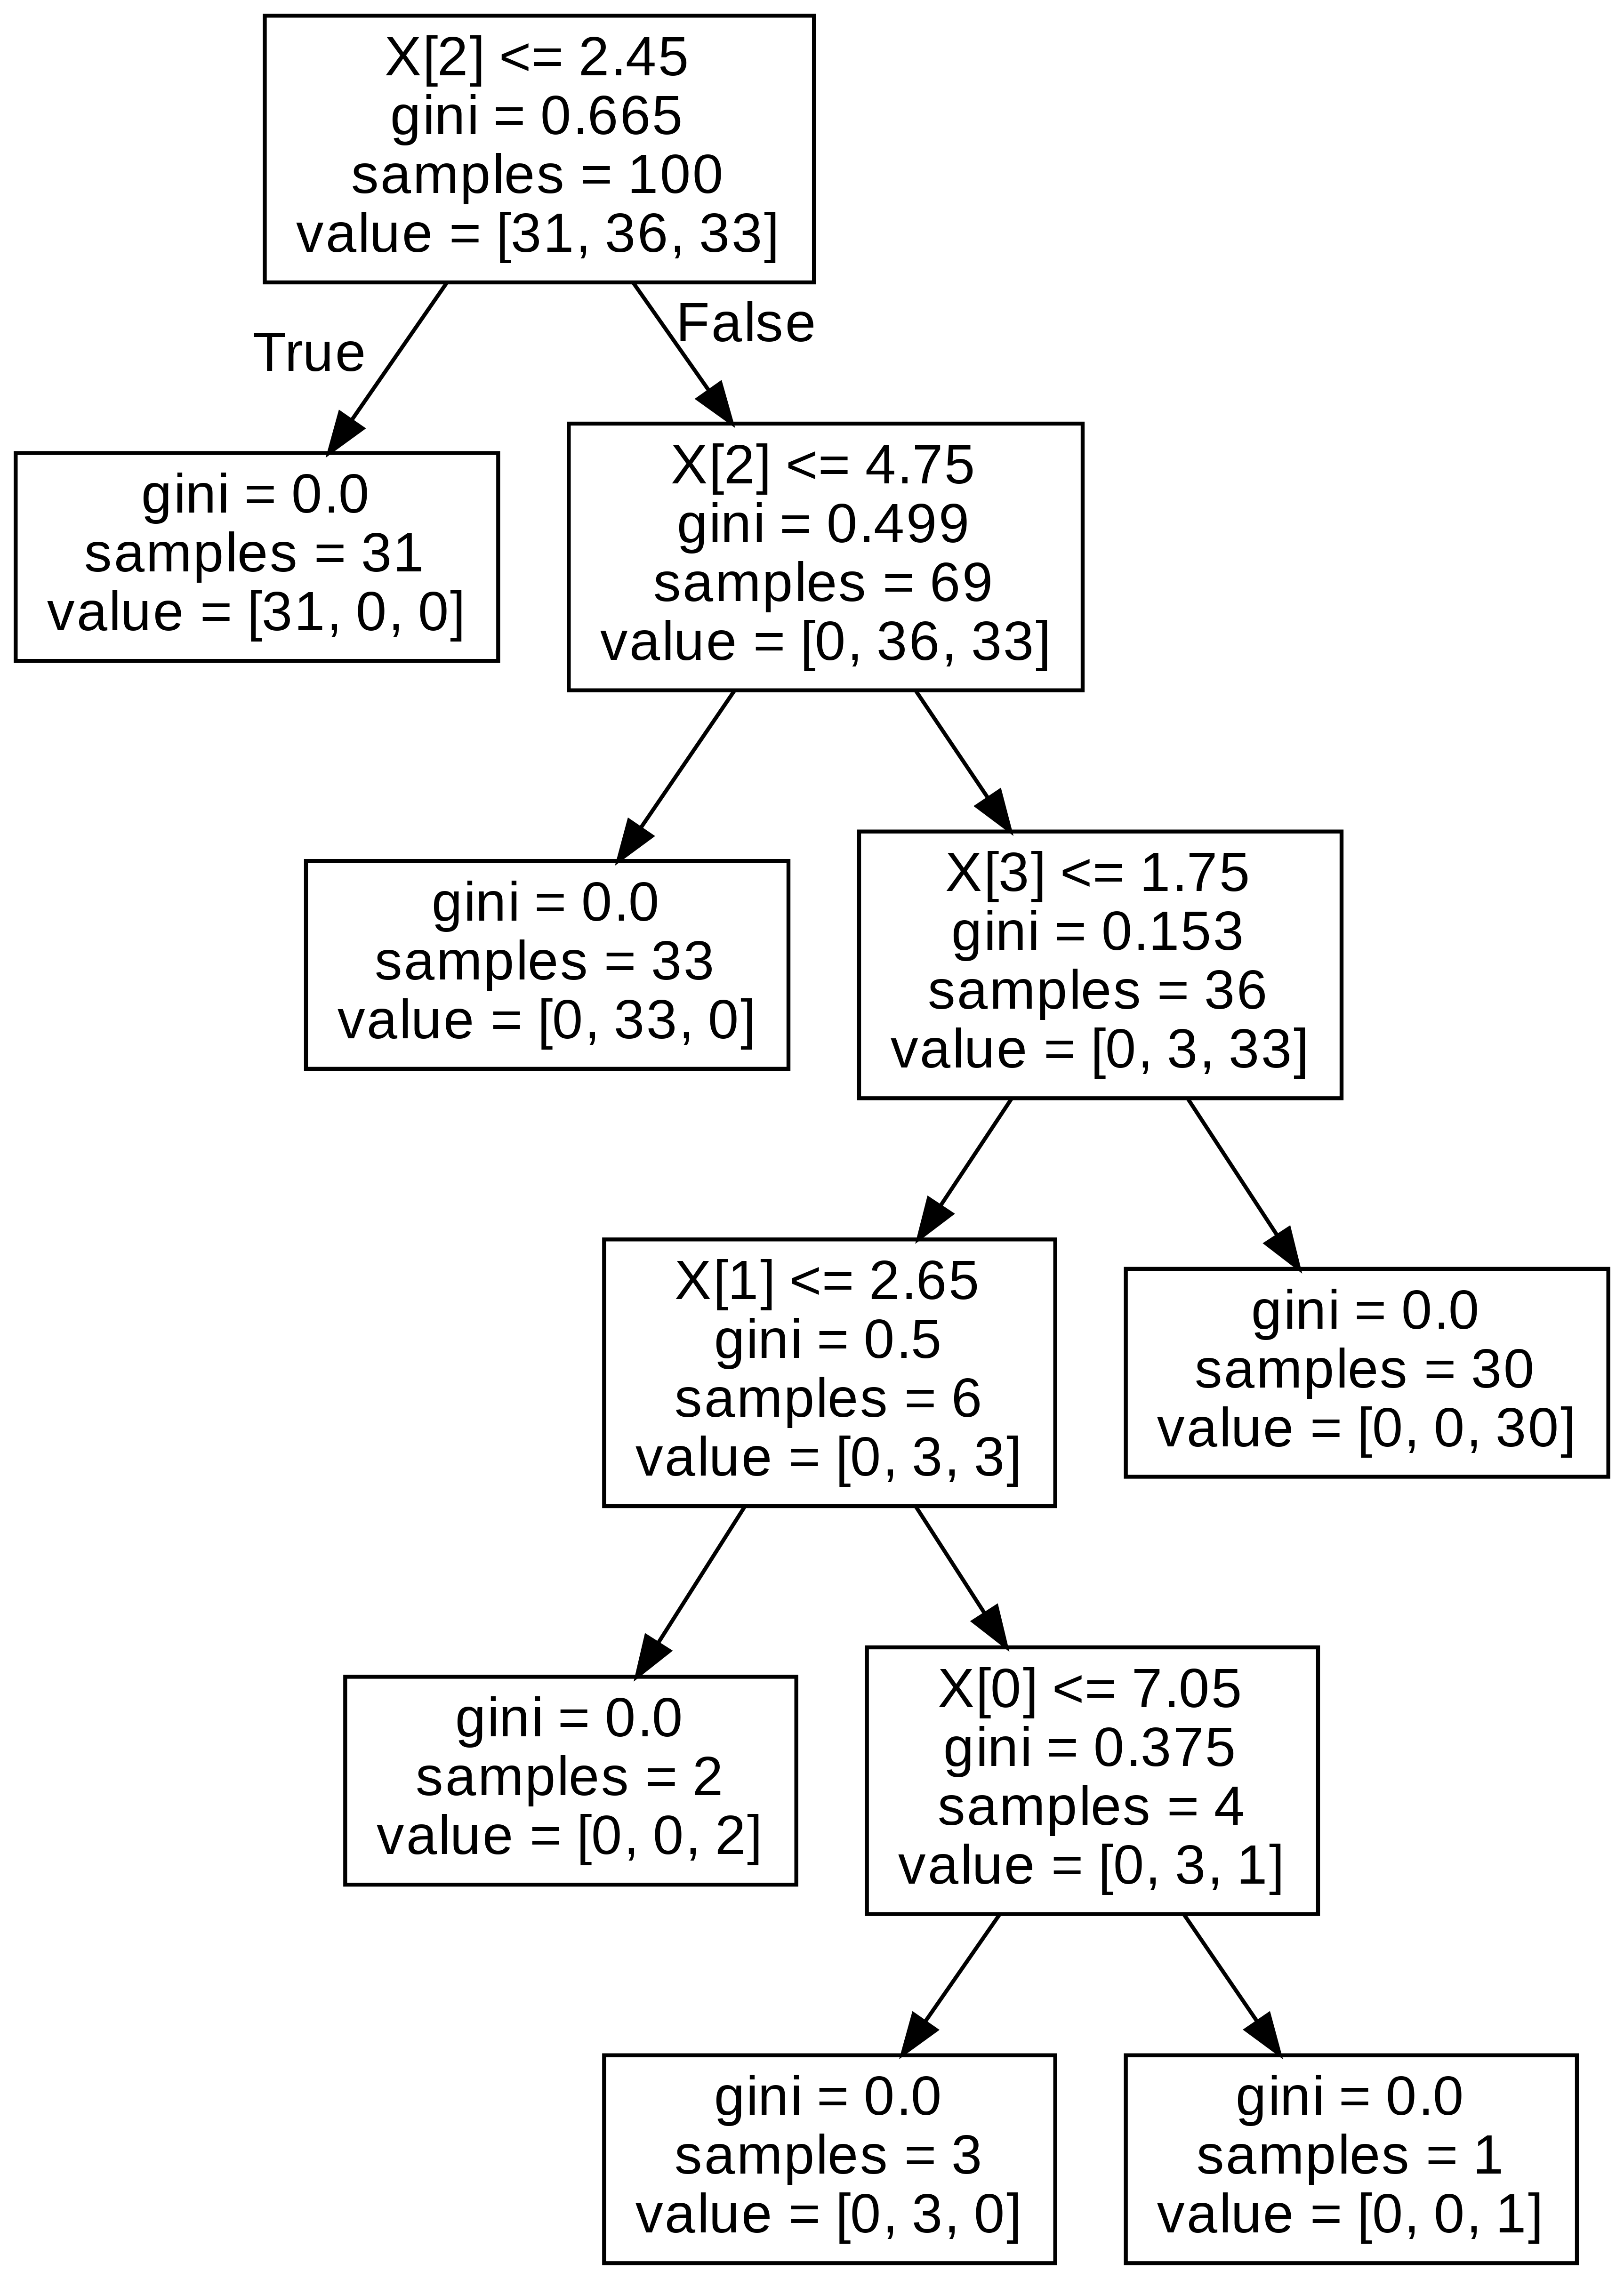

In [85]:
!pip install graphviz
from IPython.display import Image
Image(filename = 'tree.png')     # Load file 'tree.png'